# Diabetes EDA + Regression Model Training (Linear Regression + XG Boost)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

Reading the data using pandas. Since data is seperated with Tab space instead of comma, we are using delimitter as '\t'

In [2]:
df = pd.read_csv("diabetes.data", delimiter="\t")
df.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


Alright! Let's get some more information from the data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


Here is a brief summary of the data:

* The dataset contains 442 rows and 10 columns.
* All columns in the dataset contain numeric values, with data types of either int64 or float64.
* No columns appear to have any missing or null values.

#### Feature Description

Let's understand what each columns represent..

|Column| Description |
|:---|:------------|
|AGE | Age in years|
|SEX | Male as 1 and Female as 2|
|BMI| Body mass index|
|BP | Average Blood Pressure |
|S1 | TC, Total Serum Cholesterol|
|S2 | LDL, low-density lipoproteins|
|S3 | HDL, high-density lipoproteins|
|S4 | TCH, total cholesterol / HDL Ratio|
|S5 | LTG, possibly log of serum triglycerides level|
|S6 | GLU, blood sugar level|
|Y|Quantitative measure of Disease Progression one year after baseline|




Upon initial analysis of the dataset, it is evident that most columns are continuous variables, except for the 'SEX' column which has two possible categorical values. Therefore, it would be valid to treat 'SEX' as a categorical variable for subsequent analyses, as this could provide useful insights into the impact of gender on other variables.

Columns S1 to S6 appear to contain results from different tests, and have specific ranges, indicating that they are quantitative variables.
To improve clarity and ease of analysis, it would be beneficial to rename the columns with more descriptive names, rather than using the current names of S1, S2, etc. Additionally, applying camel-casing to the other column names would ensure readability throughout the dataset.

In [4]:
df.rename(columns={
    "AGE": "Age",
    "SEX": "Gender",
    "BMI": "Bmi",
    "BP": "Bp",
    "S1": "Tc",
    "S2": "Ldl",
    "S3": "Hdl",
    "S4": "Tch",
    "S5": "Ltg",
    "S6": "Glu",
    "Y": "Progression"
}, inplace=True)

df.head(10)

,Age,Gender,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu,Progression
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


This looks elegant now. 

Let's analyze the target column now by plotting a histogram and a probability plot.

Skewness - 0.44056293407014124


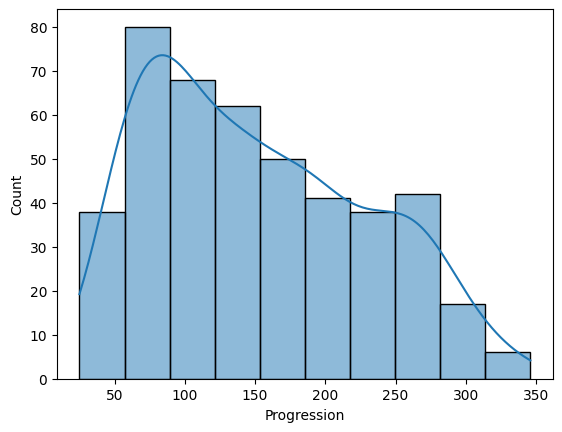

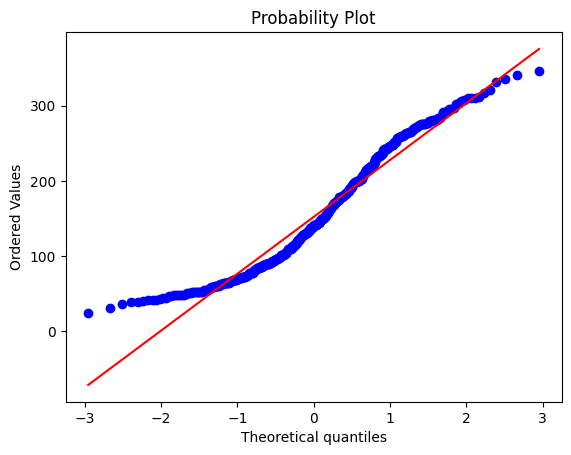

In [5]:
#histogram and normal probability plot
sns.histplot(df.Progression, kde=True, stat="count")
fig = plt.figure()
res = stats.probplot(df.Progression, plot=plt)
print(f"Skewness - {df.Progression.skew()}")

From the above chart, it is evident that that the data is slight positively skewed with skewness score of 0.44, which may affect subsequent analyses. For an efficient analysis, it may be beneficial to scale the data to a normal distribution.

To address the positive skewness, we can consider applying either a log or square root transformation. However, log transformation may have a more aggressive effect on the data. So, let's try square root transformation.

Before that, will clone the dataframe, inorder to keep the original dataframe untouched.

In [6]:
transformed_df = df.copy()

In [7]:
#applying sqrt transformation
transformed_df['Progression'] = np.sqrt(transformed_df.Progression)

Skewness - 0.08010904976527013


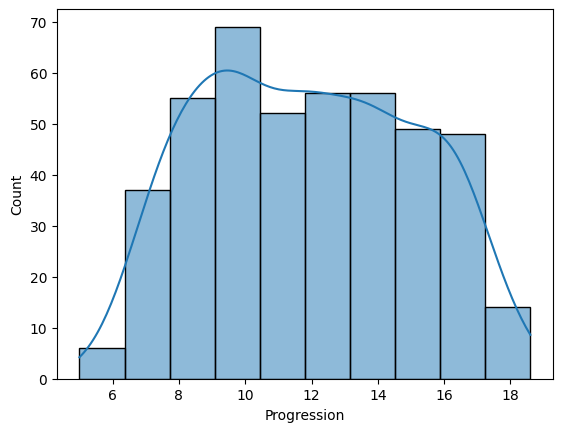

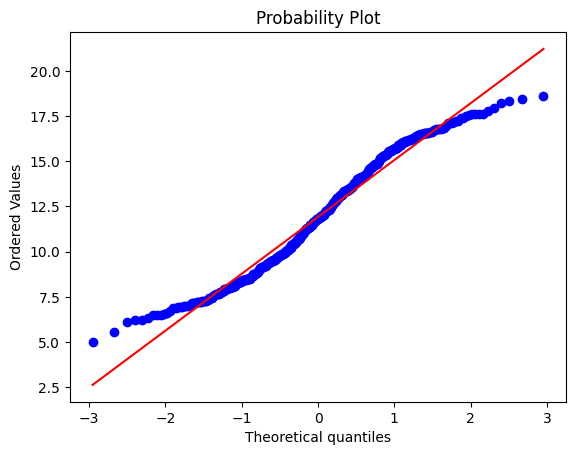

In [8]:
#histogram and normal probability plot
sns.histplot(transformed_df.Progression, kde=True)
fig = plt.figure(), 
res = stats.probplot(transformed_df.Progression, plot=plt)
print(f"Skewness - {transformed_df.Progression.skew()}")

The skewness is greatly reduced and with a good normal distribution curve. 
Skewness score of 0.08 is better than our previous score 0.44

### Outliers

Now let's clear up the outliers in continous features (except Gender column)

Plotting a box plot will give us a visual perspective of the InterQuartile Ranges (IQR) and possibility of outliers in each column.

<AxesSubplot: xlabel='variable', ylabel='value'>

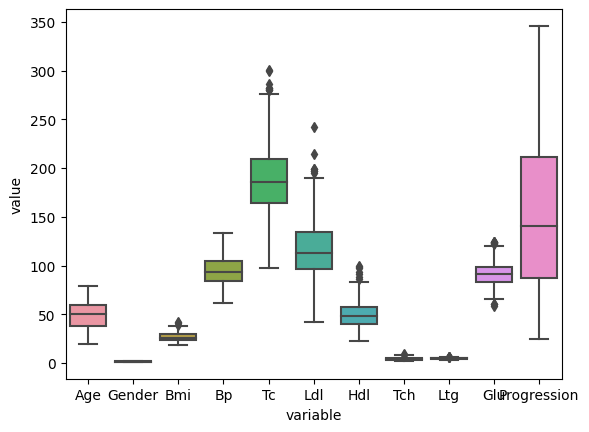

In [9]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

Observing the Median and Interquartile ranges of each column indicates that there are some possible points in the dataset which are outliers. But instead of simply comparing a single column values, let's plot it with the target column and observe the anomalies.

Computing the correlation scores with target column will give us some insights on the linearity of the features respect to target. 

In [10]:
continous_cols = ['Age', 'Bmi', 'Bp', 'Tc', 'Ldl', 'Hdl', 'Tch', 'Ltg', 'Glu', 'Progression']
transformed_df[continous_cols].corr().Progression[:-1]

Age    0.191934
Bmi    0.571196
Bp     0.432553
Tc     0.222322
Ldl    0.188222
Hdl   -0.401339
Tch    0.435525
Ltg    0.571638
Glu    0.371134
Name: Progression, dtype: float64

It looks like most of the features follows some good correlation(positive or negative) with the target. 

Tc, Age and Ldl don't have much impact on the data. Still a positive correlation of more than 0.15 helps in analyzing outliers

#### BMI 

Let's plot a scatterplot of BMI column with Progression

Scatterplot shows a 2d perspective of the data points, thus help us identify the outliers.

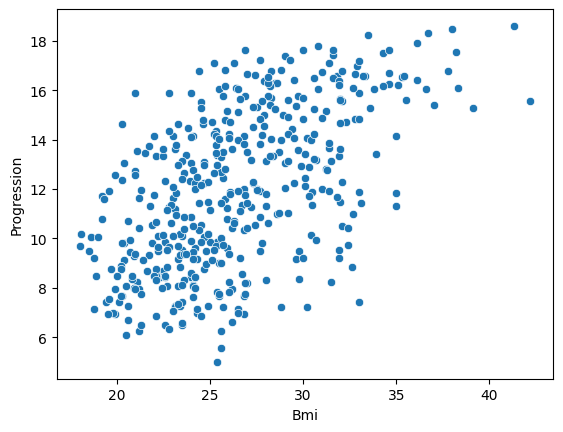

In [11]:
sns.scatterplot(x=transformed_df.Bmi, y=transformed_df.Progression)
plt.show()

The 2D chart above indicates a slightly noisy but overall linear increase, suggesting that an increase in BMI corresponds with an increase in Progression. However, one BMI point stands out above 42 with lower Progression than points with higher BMI, which may have an impact on the linear correlation. To address this, we can consider removing this point from the analysis.

Usual BMI ranges,

|Range|Status|
|:----|:-----|
|Less than 18.5|Underweight|
|18.5 - 24.9|Normal|
|25 - 29.9|Overweight|
|Greater than 30|Obese|

Furthermore, we observe some data points with a BMI above 25 but low Progression, which are likely outliers. It is worth noting that people with a normal BMI typically have a higher Progression than these outliers. Removing these outliers may improve the accuracy of the analysis.

In [12]:
bmi_del_indexes = transformed_df.loc[((transformed_df.Progression<6) & (transformed_df.Bmi>25)) | (transformed_df.Bmi>42)].index
transformed_df.drop(bmi_del_indexes, inplace=True)
transformed_df

,Age,Gender,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu,Progression
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,12.288206
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,8.660254
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,11.874342
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,14.352700
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,11.618950
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,13.341664
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,10.198039
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,11.489125
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,14.832397


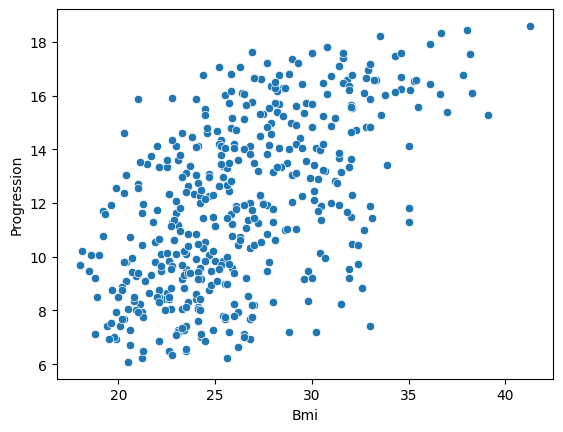

In [13]:
sns.scatterplot(x=transformed_df.Bmi, y=transformed_df.Progression)
plt.show()

Now, we can see a good linearity in the BMI

### BP

Let's analyze the outliers of BP

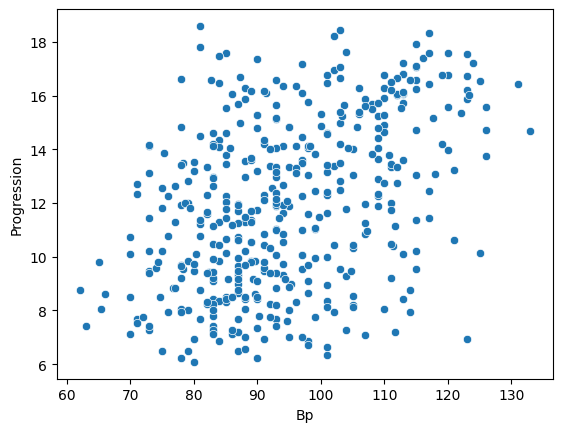

In [14]:
sns.scatterplot(x=transformed_df.Bp, y=transformed_df.Progression)
plt.show()

It seems like some points above 120 have less Progression compared to other points. Let's consider removing those points.

In [15]:
bp_del_indexes = transformed_df.loc[((transformed_df.Progression<12) & (transformed_df.Bp>120)) | ((transformed_df.Progression>18) & (transformed_df.Bp<90))].index
transformed_df.drop(bp_del_indexes, inplace=True)
transformed_df

,Age,Gender,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu,Progression
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,12.288206
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,8.660254
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,11.874342
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,14.352700
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,11.618950
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,13.341664
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,10.198039
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,11.489125
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,14.832397


### TC - Total Cholestrol

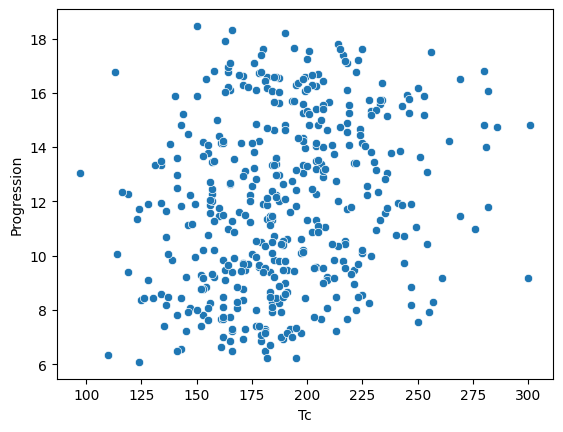

In [16]:
sns.scatterplot(x=transformed_df.Tc, y=transformed_df.Progression)
plt.show()

Upon initial analysis, it appears that the TC column is quite noisy and has a very low correlation with the Progression of the disease. Additionally, we have another column, Total Cholesterol (TCH), which provides similar information.

TCH and TC both relate to cholesterol levels in the blood, TCH is a more general term used to describe the overall level of cholesterol, while TC specifically refers to the amount of cholesterol in the liquid portion of the blood (the serum).

It is important note that Tc has a strong correlation with Ldl. So let's compare with Ldl.

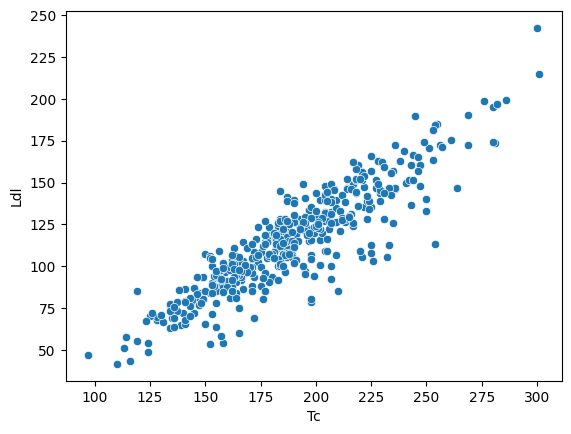

In [17]:
sns.scatterplot(x=transformed_df.Tc, y=transformed_df.Ldl)
plt.show()

Wow.. It shows a great linear relationship. This will help a lot in our analysis.

But Tc points above 300 and Ldl above 250 deviating the trend. So let's clear that data.

In [18]:
tc_del_indexes = transformed_df.loc[(transformed_df.Tc>290) & (transformed_df.Ldl>225)].index
transformed_df.drop(tc_del_indexes, inplace=True)
transformed_df

,Age,Gender,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu,Progression
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,12.288206
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,8.660254
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,11.874342
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,14.352700
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,11.618950
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,13.341664
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,10.198039
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,11.489125
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,14.832397


### LDL - Low Density Lipoproteins

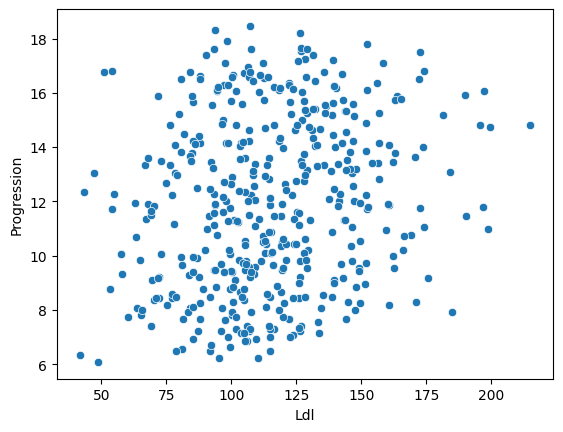

In [19]:
sns.scatterplot(x=transformed_df.Ldl, y=transformed_df.Progression)
plt.show()

Ldl have a very noisy data and low correlation with Progression. But as we seen earlier, it has a very good correlation with Tc.

Low density lipoprotein (LDL) is a type of cholesterol also often referred to as 'bad' cholesterol. As expected, the above chart shows a slight positive correlation between LDL levels and disease Progression. However, there are some data points with LDL levels above 225 that have lower Progression than other points with lower LDL levels. Similarly, some data points with low LDL levels have surprisingly high Progression levels, which is unusual.

These outliers can significantly impact the analysis, so it would be appropriate to mark them as outliers and remove them from the dataset.

In [20]:
bp_del_indexes = transformed_df.loc[(transformed_df.Ldl>210) | ((transformed_df.Progression<12) & (transformed_df.Ldl>170)) |((transformed_df.Progression>12) & (transformed_df.Ldl<60))].index
transformed_df.drop(bp_del_indexes, inplace=True)
transformed_df

,Age,Gender,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu,Progression
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,12.288206
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,8.660254
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,11.874342
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,14.352700
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,11.618950
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,13.341664
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,10.198039
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,11.489125
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,14.832397


### Hdl - High Density Lipoprotiens

HDL (high-density lipoprotein) is considered "good" cholesterol because it helps to remove excess cholesterol from the bloodstream. So increase in the Hdl levels should reduce the Progression. From correlation score, it is evident that there is a negative linear relationship.

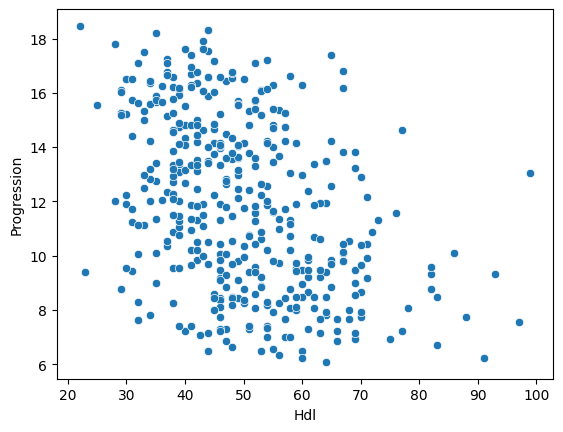

In [21]:
sns.scatterplot(x=transformed_df.Hdl, y=transformed_df.Progression)
plt.show()

From the chart it seems there is a pretty good linaerity, but some points with higher Hdl have a high Progression than other points. Also low Hdl with little high Progression. It'll beneficial to remove these outliers.

In [22]:
hdl_del_indexes = transformed_df.loc[((transformed_df.Hdl>90) & (transformed_df.Progression>12))| ((transformed_df.Hdl<30) & (transformed_df.Progression<10))].index
transformed_df.drop(hdl_del_indexes, inplace=True)
transformed_df

,Age,Gender,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu,Progression
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,12.288206
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,8.660254
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,11.874342
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,14.352700
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,11.618950
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,13.341664
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,10.198039
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,11.489125
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,14.832397


### TCH - Total Cholestrol / HDL Ratio

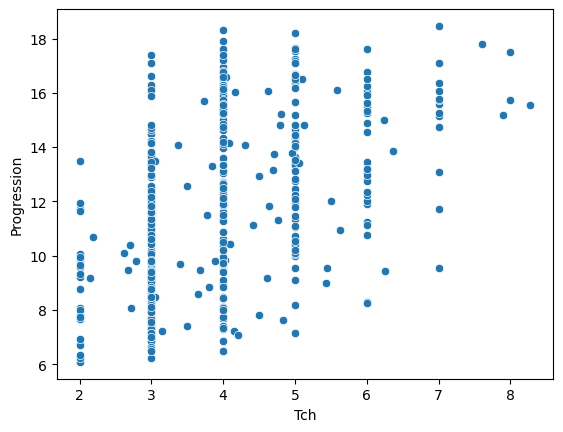

In [23]:
sns.scatterplot(x=transformed_df.Tch, y=transformed_df.Progression)
plt.show()

Usual HDL Ratio range is 2-6, in which above 5 is critical. But here we can see ranges above 8. 

Let's consider the range 2-7. Above that it seems a bit noisy and irregular. Let's remove those as outliers.

In [24]:
tch_del_indexes = transformed_df.loc[transformed_df.Tch>7].index
transformed_df.drop(tch_del_indexes, inplace=True)
transformed_df

,Age,Gender,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu,Progression
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,12.288206
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,8.660254
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,11.874342
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,14.352700
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,11.618950
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,13.341664
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,10.198039
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,11.489125
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,14.832397


### Glu - Blood sugar level

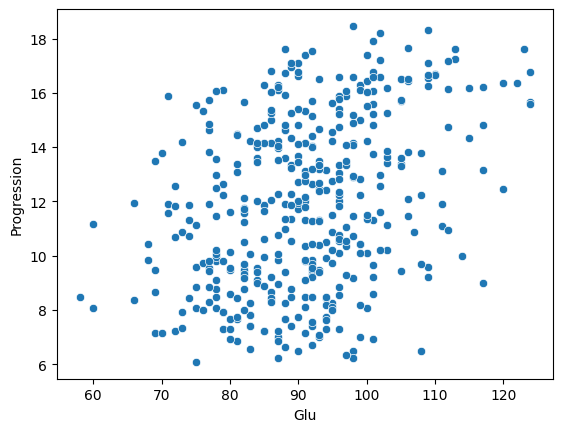

In [25]:
sns.scatterplot(x=transformed_df.Glu, y=transformed_df.Progression)
plt.show()

Blood sugar levels are primary for diabetes Progression. Though the data is a bit noisy we can notice an upward trend. But data points below 65 Glu have little higher progresssion than other points.
Let's remove these abnormal data points.

In [26]:
stt_del_indexes = transformed_df.loc[transformed_df.Glu<65].index
transformed_df.drop(stt_del_indexes, inplace=True)
transformed_df

,Age,Gender,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu,Progression
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,12.288206
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,8.660254
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,11.874342
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,14.352700
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,11.618950
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,13.341664
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,10.198039
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,11.489125
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,14.832397


### Correlation among Features

Now the dataset is cleaned and ready.

Let's look for correlation among Features and understand their relationships.

Using heatmap to get the correlation coefficient of each feature with other.

<AxesSubplot: >

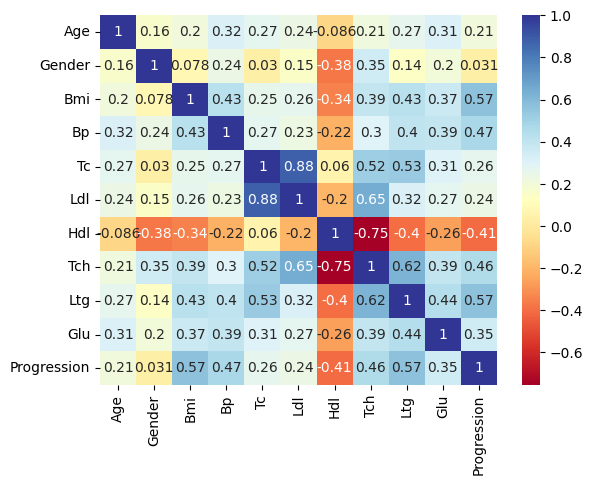

In [27]:
sns.heatmap(transformed_df.corr(), cmap="RdYlBu", annot=True)

Initial observations from the heatmap indicate the following:

- Diabetes progression is positively correlated with BMI, blood pressure (BP), high-density lipoprotein (HDL), and serum triglyceride (LTG) levels.

- HDL has a strong negative correlation with most features, suggesting a protective effect against diabetes progression.

- Total cholesterol (TC) and low-density lipoprotein (LDL) show a positive linear correlation, indicating that an increase in TC is likely to result in an increase in LDL.

- Gender does not seem to have a significant effect on diabetes progression.

- Some test results show high correlation with others, suggesting that they may provide redundant information.

Let's take the continous features and observe the relations with other features using pairplot

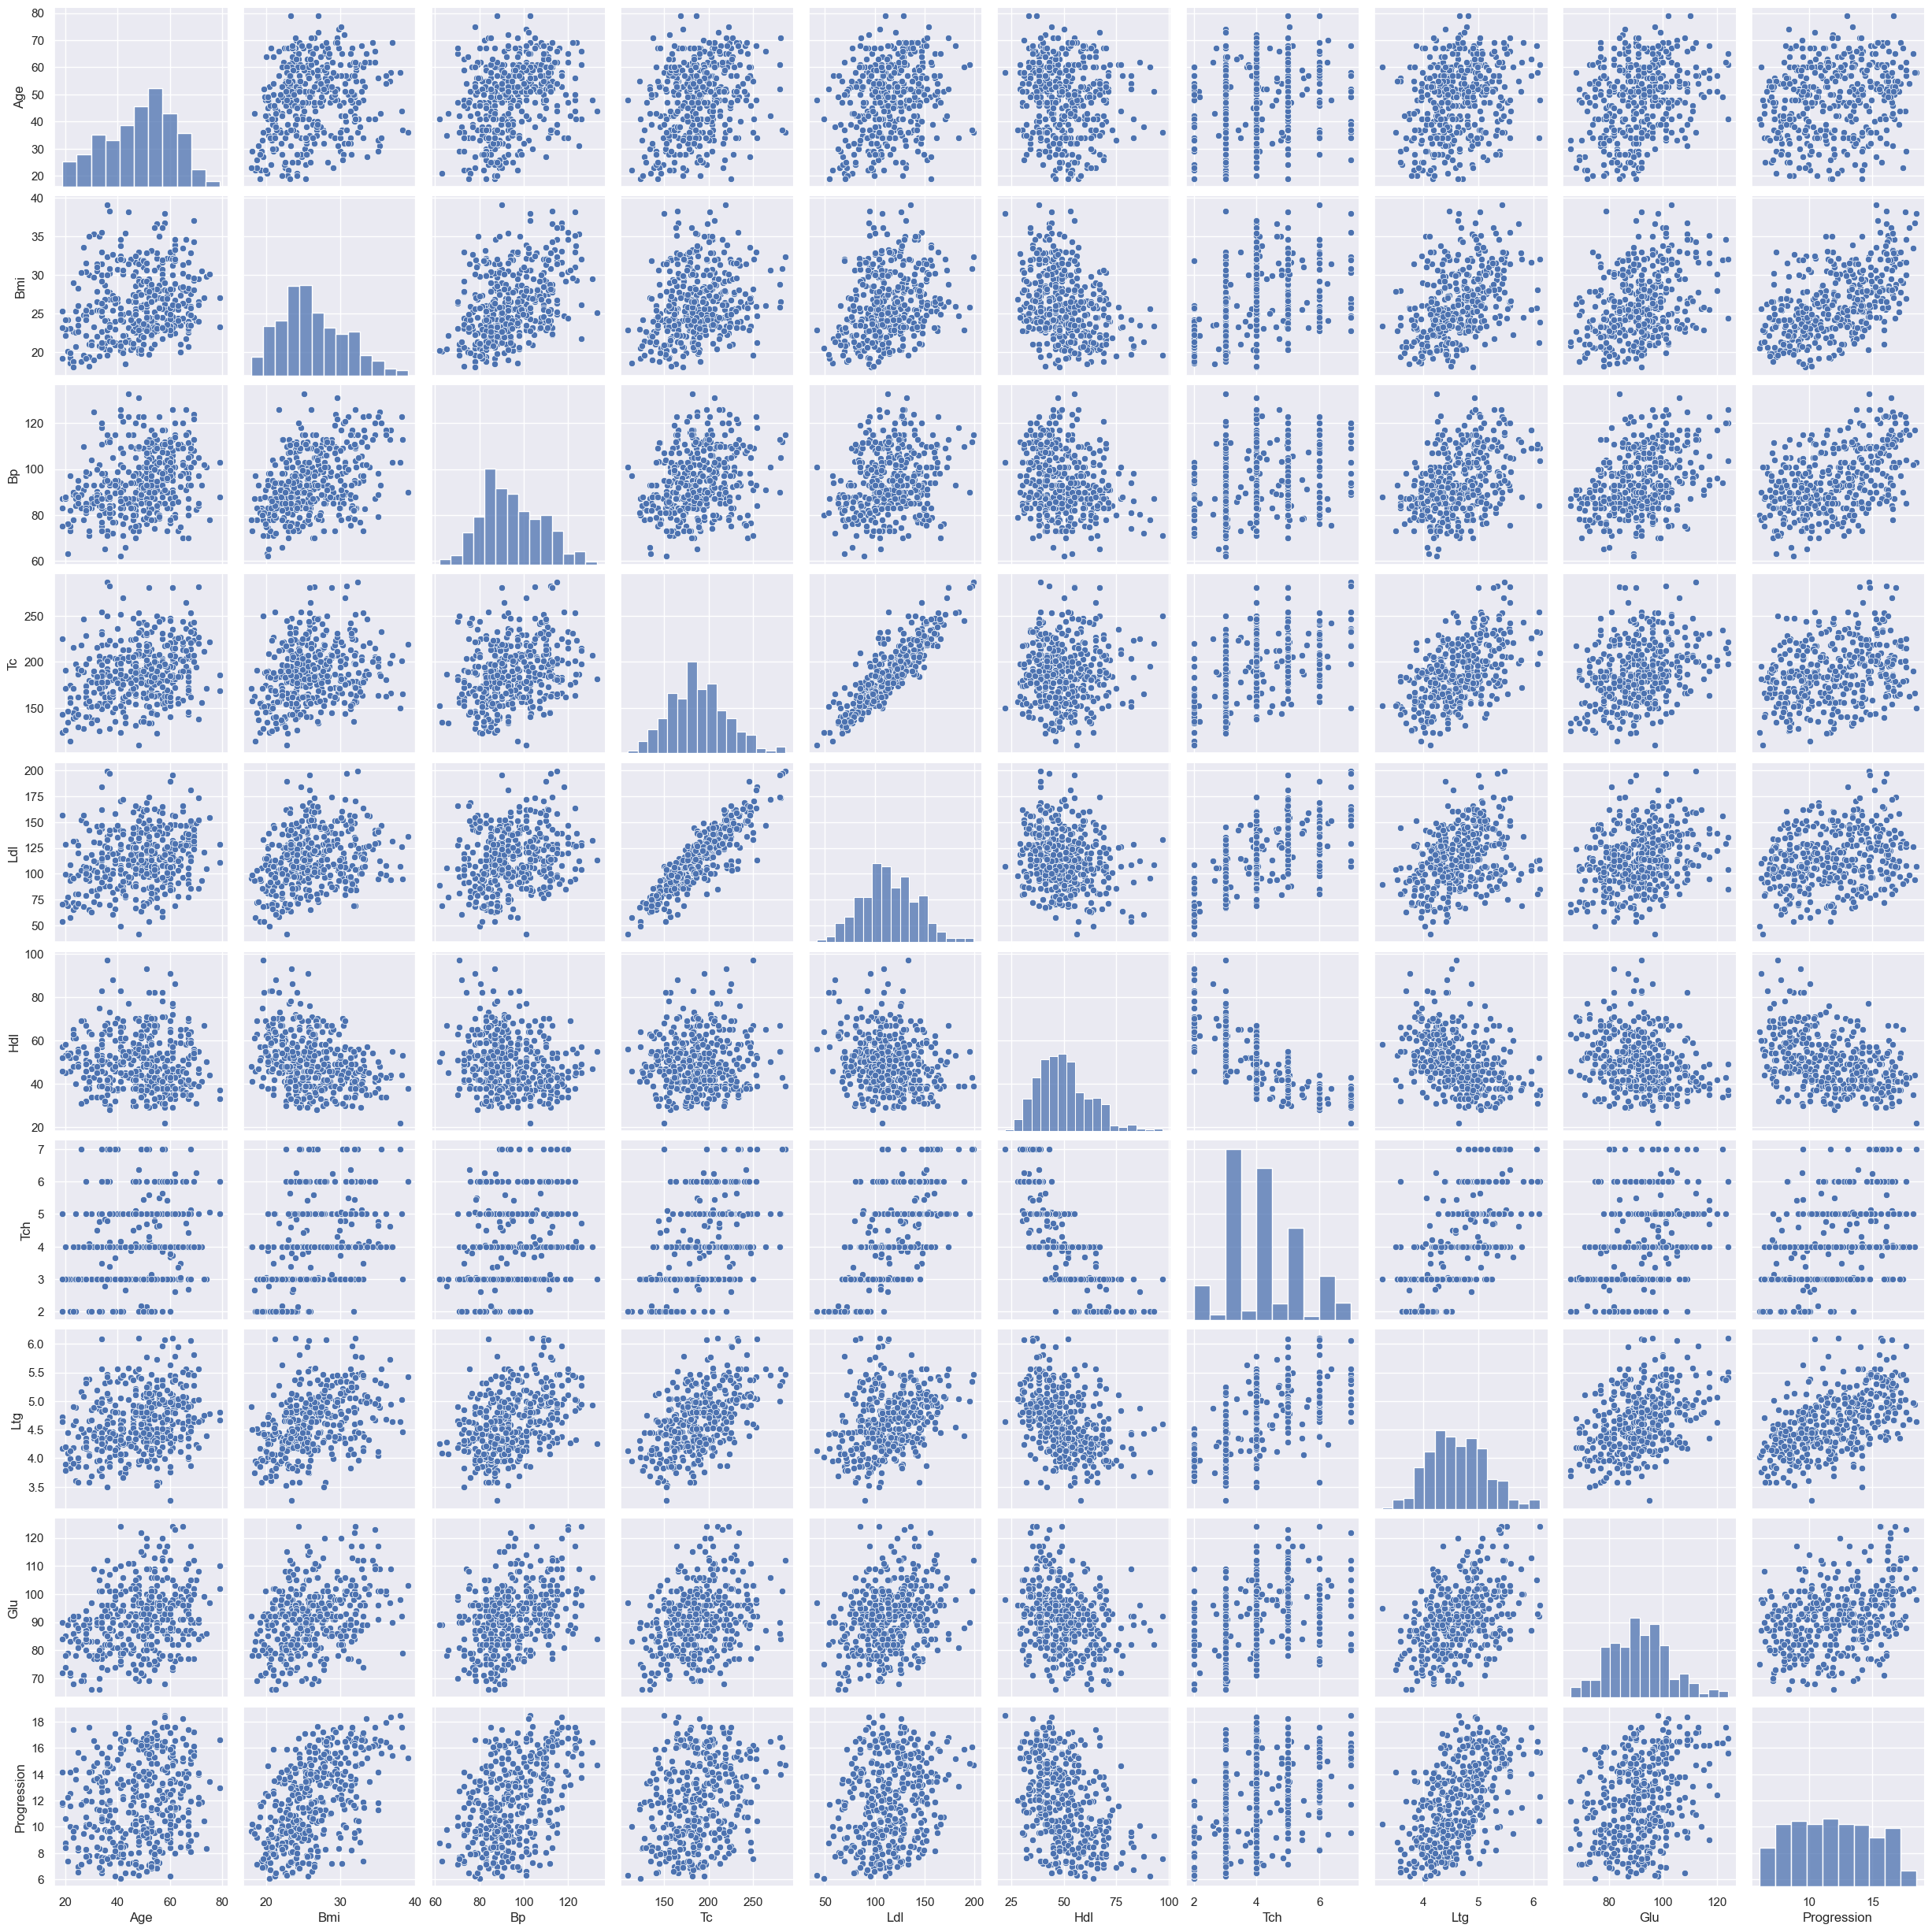

In [28]:
#scatterplot
sns.set()
cols = ['Age', 'Bmi', 'Bp', 'Tc', 'Ldl', 'Hdl', 'Tch', 'Ltg', 'Glu', 'Progression']
sns.pairplot(transformed_df[cols], height = 2.5)
plt.show()

From the above pairplot we can make the following observations.

#### Age
- Age has a positive correlation with most of the columns including Bp, Tc, Ldl, Tch, Ltg, Glu, and Progression. This indicates that as the age increases, the values of these columns also tend to increase.

- Bmi has a moderate positive correlation with Age, indicating that older individuals tend to have a higher BMI.

- Hdl has a negative correlation with Age, although it is relatively weak. This suggests that as individuals get older, their HDL levels tend to decrease slightly.

#### Body Mass Index (BMI)

- BMI has a strong positive correlation with diabetes progression. So higher the BMI values, higher will be the Diabetes Progression.

- Next high linearity Bmi have is with BP and Ltg Levels. This shows that BMI values will tend to increase the Blood Pressure and Ltg levels.

- BMI also has a moderate positive correlation with Tch, Tc, Ldl, and Glu. This suggests that higher BMI values are associated with higher cholesterol and glucose levels.

- BMI has a strong negative correlation with Hdl, indicating that higher BMI values are associated with lower Hdl levels.

#### Blood Pressure (BP)

- Blood pressure have a strong impact on the Diabetic Progression, as we can see a good positive lienarity.

- Blood Pressure levels are likely associated with Glucose and Ltg Levels. So Blood sugar levels are more likely affected due to Blood Pressure.

- It have moderate positive linearity with Tc, Ldl and Tch levels and negative linearity with Hdl. Indicating that High Blood Pressure can increase the Overall cholestrol levels.

#### Total Cholestrol (Tc)

- Tc has a moderate positive correlation with Age, indicating that older individuals tend to have higher cholesterol levels.

- Tc has a average positive correlation with Bmi, BP and Glucose, indicating that higher BMI, Blood Pressure and Glucose may be associated with slightly higher cholesterol levels.

- Tc is the total average of Ldl, Hdl, Ltg levels. As we can see it has a strong positive correlation with Ldl, which is expected, as Low Density Lipoproteins(Ldl) cholesterol is a major component of total cholesterol.


#### Low Density Lipoproteins (Ldl)

Low Density Lipoproteinds are usually called 'Bad' Cholestrols which badly affects an individual's health.

- We can observe that there is a strong positive correlation between TC and LDL and TCH, which indicates that higher levels of TC are associated with higher levels of LDL and TCH. This is expected as TC is the sum of LDL, HDL, and other lipid components.

- Also, there is a weak negative linearity between TC and HDL, which indicates that higher levels of TC are associated with lower levels of HDL. 

- The correlation between TC and Progression is not so great, indicating that TC may not have a strong impact on the progression of diabetes.

#### High Density Lipoproteins (Hdl)

High Density Lipoprotiens which are usually called 'Good' Cholestrols have some benifits on the persons health.

- Diabetes progression have a moderate negative lienarity with Hdl levels, indicating higher Hdl levels will decrease the Diabetic Progression.

- There is a strong negative correlation with Tch levels(Total Cholestrol HDL ratio). So higher the Hdl levels, lower will be the Tch Ratio.

- Most the other columns are negatively correlated with Hdl, it shows that balanced Hdl level is needed.

#### Total Cholestrol / HDL ratio

HDL Ratio are score of Total cholestrol levels. It's somewhat similar to the Total Cholestrol (TC).

- Increase in Hdl Ratio, has a moderate increase trend with Progression. Indicating that Hdl Ratio is notable for monitoring the progression.

- Similar to Tc, Increase in Ltg, Ldl and decrease in Hdl will have a strong impact on the Tch scores.

- There are weak and average positive relationships with other columns like Age, BP, Glu and BMI.

#### Log of serum Triglycerides (Ltg)

- Ltg levels shows moderately strong positive correlations with other columns, especially with BMI , Tc, and Glu, indicating that higher values of LTG are associated with higher values of these variables.

- The correlations with age, LDL, BP, and Progression are moderate.

#### Blood Sugar Levels (Glu)

- Based on the correlation of Glu with other columns in the dataset, we can observe that Glu has a moderate positive linear relationship with Age, Bmi, Tch, Bp, and Tc.

- Increase in Age will tend to increase in BP, thus increasing Glucose levels. BMI is also contributing a noticebale part in the rise of Blood sugar levels.

- Highest correlation we can observe is the Ltg levels, indicating increase in Glucose level will increase Ltg levels vice versa.


#### Feature Importance inaccordance with the target

The most important features in predicting the progression of diabetes observed from the correlation values appear to be:

- BMI (0.566103)

- Blood Pressure (0.474315)

- Total Cholesterol / HDL Ratio (0.457194)

- LTG (0.565538)

- HDL (-0.410078) (Negative Correlation)

- Age (0.207099)

#### Overall Conclusion

- BMI, blood pressure, and triglycerides (LTG) have the highest correlations with disease progression, indicating that these factors may be strong predictors of disease progression.

- Total cholesterol (TC), low-density lipoprotein (LDL), and high-density lipoprotein (HDL) are all moderately correlated with disease progression, with LDL having the weakest correlation among the three.

- LDL and TC are strongly correlated, indicating that cholestrol levels are stronly associated with Low-density lipoproteins.

- Gender has the weakest correlations with all other variables in the dataset, suggesting that it may not be a strong predictor of overall health.

### Limitations and Issues

Limited size: The dataset contains only 442 records, which may not be sufficient to capture the full complexity of the disease.

Limited features: The dataset contains only 10 features, which may not be sufficient to capture all the relevant information about the disease.

Outliers: The dataset contains some outliers, which can have a significant impact on statistical analyses.

Noise: There is the presence of noise in the data which may be caused by measurement error, data entry errors, or other factors that can affect the accuracy of the measurements.

Limited scope: The dataset only covers certain aspects of diabetes, such as blood sugar levels and lipid levels, and does not include other important factors that can affect the disease, such as lifestyle, diet, and family history.

# Training a Linear model using Least Squares Regression

Since we transformed target column for EDA, we are transfering back to original values.

In [29]:
transformed_df['Progression'] = df.loc[transformed_df.index]['Progression']
transformed_df

,Age,Gender,Bmi,Bp,Tc,Ldl,Hdl,Tch,Ltg,Glu,Progression
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


Importing necessary libraries

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from mpl_toolkits.mplot3d import Axes3D

Splitting training and testing sets with test_set size of 0.2

In [31]:
X_train, X_test, y_train, y_test = train_test_split(transformed_df.drop("Progression", axis=1), 
                                                    transformed_df['Progression'], 
                                                    test_size=0.2, 
                                                    random_state=45)

Let's train a model with pair of columns to find out which 2 features are contributing more to Disease Progression

In [ ]:
pairCol_accuracies = []

for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
        cols_to_train=[columns[i], columns[j]]

        linear_model = LinearRegression()
        linear_model.fit(X=X_train[cols_to_train], y=y_train)

        train_accuracy = mean_squared_error(y_true=y_train, y_pred=linear_model.predict(X_train[cols_to_train]))
        test_accuracy = mean_squared_error(y_true=y_test, y_pred=linear_model.predict(X_test[cols_to_train]))
        pairCol_accuracies += [{'Column':cols_to_train, "Training MSE":train_accuracy, "Validation MSE":test_accuracy}]
        
        del linear_model
    
pairCol_accuracies_df = pd.DataFrame(pairCol_accuracies)


In [37]:
pairCol_accuracies_df.sort_values(by="Validation MSE").head(10)


,Column,Training MSE,Validation MSE
22,"[Bmi, Ltg]",3207.937437,3008.988158
17,"[Bmi, Bp]",3470.141616,3345.791179
28,"[Bp, Ltg]",3549.052013,3347.306066
23,"[Bmi, Glu]",3726.388893,3632.054078
1,"[Age, Bmi]",3817.192844,3793.894375
44,"[Ltg, Glu]",3898.887529,3820.651516
18,"[Bmi, Tc]",3770.457035,3855.158983
9,"[Gender, Bmi]",3864.696745,3874.551570
40,"[Hdl, Ltg]",3739.681246,3889.206206
33,"[Tc, Ltg]",3980.718778,3895.836542


Among all pair feature trainings, 'Bmi' and 'Ltg' pairs are performing better than others, but we can notice there are some underfitting happening.  But 'Bmi', 'Ltg' pairs looks like stable, with less difference between Training MSE and Validation MSE.

Let's take the featurs 'BMI' and 'BP' and plot the plane in a 3d graph.

<IPython.core.display.Javascript object>


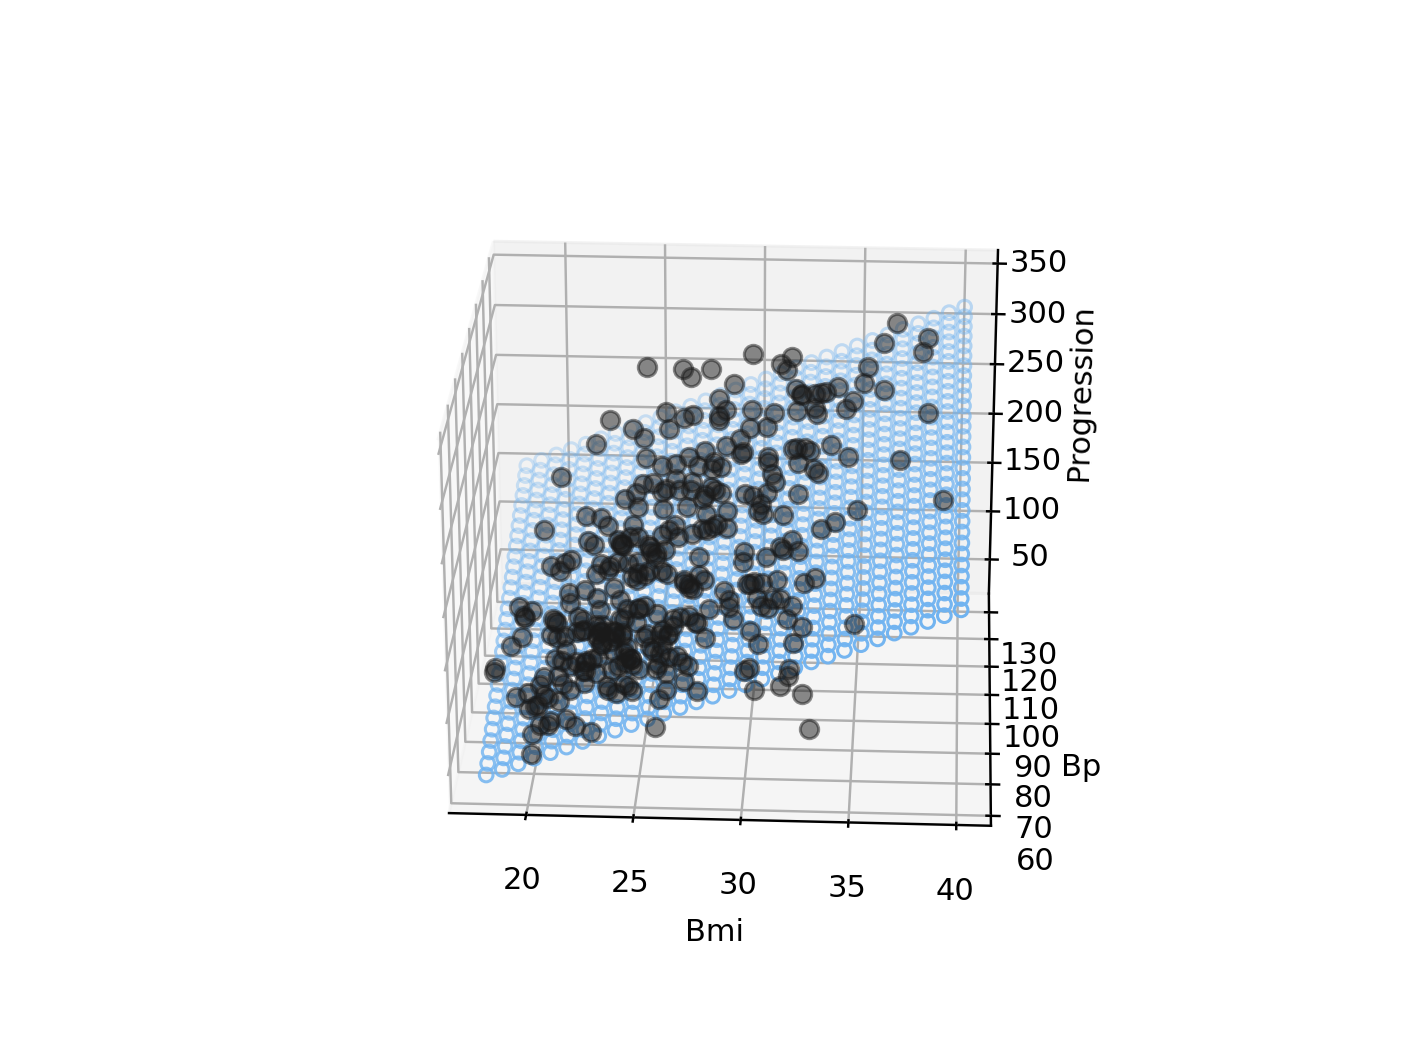

In [38]:
%matplotlib notebook

col_1 = 'Bmi'
col_2 = 'Bp'

X = X_train[[col_1, col_2]].values.reshape(-1,2)
Y = y_train

x = X[:, 0]
y = X[:, 1]
z = Y

min1= round(X_train[col_1].min())
max1= round(X_train[col_1].max())+1

min2= round(X_train[col_2].min())
max2= round(X_train[col_2].max())+1


x_pred = np.linspace(min1, max1, 30)
y_pred = np.linspace(min2, max2, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

linear_model = LinearRegression()
linear_model.fit(X, Y)
predicted = linear_model.predict(model_viz)

plt.style.use('default')

fig1 = plt.figure()

ax1 = fig1.add_subplot(projection='3d')
ax1.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax1.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax1.set_xlabel(col_1, fontsize=10)
ax1.set_ylabel(col_2, fontsize=10)
ax1.set_zlabel('Progression', fontsize=10)

# Rotate the axes and update
for angle in range(0, 360*4 + 1):
    # Normalize the angle to the range [-180, 180] for display
    angle_norm = (angle + 180) % 360 - 180

    # Cycle through a full rotation of elevation, then azimuth, roll, and all
    elev = azim = roll = 0
    if angle <= 360:
        elev = angle_norm
    elif angle <= 360*2:
        azim = angle_norm
    elif angle <= 360*3:
        roll = angle_norm
    else:
        elev = azim = roll = angle_norm

    # Update the axis view and title
    ax1.view_init(elev, azim, roll)

    plt.draw()
    plt.pause(.001)

## Training LinearRegression Model with all the parameters

In [40]:
full_model = LinearRegression()

In [41]:
full_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# training MSE
mean_squared_error(y_true=y_train, y_pred=full_model.predict(X_train))

2802.942087873877

In [43]:
# Validation MSE
mean_squared_error(y_true=y_test, y_pred=full_model.predict(X_test))

2720.780152235178

### Observation:
A lower MSE value indicates better model performance, as it implies that the model's predictions are closer to the actual values. Therefore, in this case, although the model's performance is not optimal, it is still reasonably good as the difference between the training and validation MSE values is not significantly high.

In [44]:
coeffs = full_model.coef_
features = X_train.columns
print("Feature coefficients:")
for i in range(len(features)):
    print(f"{features[i]} = {round(coeffs[i], 5)}")
    
print(f"\ny-intercept: {linear_model.intercept_}")

Feature coefficients:
Age = -0.03557
Gender = -21.81722
Bmi = 5.0941
Bp = 1.3852
Tc = -0.84602
Ldl = 0.62017
Hdl = -0.02045
Tch = 10.0574
Ltg = 51.13867
Glu = 0.07723

y-intercept: -201.89663527304464


The value of each coefficient indicates the change in the output variable for a one-unit change in the corresponding input feature, while holding all other features constant. A one-unit increase in Bmi would lead to an increase of 5.0941 in the output variable. The y-intercept value is the predicted value of the output variable when all input features are zero. In this case, the predicted value is -201.8966.

# Training the model with different training sizes

In [45]:
trainsize_accuracies = []
train_sizes = [20, 50, 100, 200, 300]

for trainSize in train_sizes:
    
    X_train, X_test, y_train, y_test = train_test_split(transformed_df.drop("Progression", axis=1), 
                                                        transformed_df['Progression'], 
                                                        train_size=trainSize,
                                                        random_state=45)
    
    linear_model = LinearRegression()
    linear_model.fit(X=X_train, y=y_train)
    
    train_accuracy = mean_squared_error(y_true=y_train, y_pred=linear_model.predict(X_train))
    test_accuracy = mean_squared_error(y_true=y_test, y_pred=linear_model.predict(X_test))
    trainsize_accuracies += [{'Train_Size':trainSize, "Training MSE":train_accuracy, "Validation MSE":test_accuracy}]
    
    del linear_model
    
trainsize_accuracies_df = pd.DataFrame(trainsize_accuracies)

In [46]:
trainsize_accuracies_df

,Train_Size,Training MSE,Validation MSE
0,20,464.059742,4572.664136
1,50,1499.373371,3527.379292
2,100,2228.179292,3144.164404
3,200,2589.078930,3017.671377
4,300,2717.582171,2979.258828


As the training set size increases, the training MSE and validation MSE tend to decrease. This is because the model has more data to learn from and generalize better. However, the decrease in MSE tends to saturate after a certain point, as seen in the table.

From the given table, we can see that as the training set size increases from 20 to 300, the training MSE decreases from 464.060 to 2717.582 and the validation MSE decreases from 4572.664 to 2979.259. This shows that increasing the training set size leads to better performance of the model on both training and validation sets. However, beyond a certain point, the improvement in performance becomes negligible.

# Training with XGBoost model

In [47]:
X_train, X_test, y_train, y_test = train_test_split(transformed_df.drop("Progression", axis=1), 
                                                    transformed_df['Progression'], 
                                                    test_size=0.2, 
                                                    random_state=45)

In [48]:
columns = X_train.columns

### Train XGBoost model with pair of features

In [60]:
pairCol_accuracies = []

for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
        cols_to_train=[columns[i], columns[j]]

        xgb_model = XGBRegressor(n_estimators=10, max_depth=1)
        xgb_model.fit(X=X_train[cols_to_train], y=y_train)

        train_accuracy = mean_squared_error(y_true=y_train, y_pred=xgb_model.predict(X_train[cols_to_train]))
        test_accuracy = mean_squared_error(y_true=y_test, y_pred=xgb_model.predict(X_test[cols_to_train]))
        pairCol_accuracies += [{'Column':cols_to_train, "Training MSE":train_accuracy, "Validation MSE":test_accuracy}]
        
        del xgb_model
    
pairCol_accuracies_df = pd.DataFrame(pairCol_accuracies)


In [61]:
pairCol_accuracies_df.sort_values(by="Validation MSE").head(10)

,Column,Training MSE,Validation MSE
22,"[Bmi, Ltg]",3021.316608,3251.202100
17,"[Bmi, Bp]",3373.333844,3540.290296
28,"[Bp, Ltg]",3335.576016,3754.683155
1,"[Age, Bmi]",3686.798920,3796.023171
23,"[Bmi, Glu]",3561.576266,3832.673823
20,"[Bmi, Hdl]",3440.644078,3844.480844
9,"[Gender, Bmi]",3696.328647,3887.122992
18,"[Bmi, Tc]",3651.505256,3908.984134
19,"[Bmi, Ldl]",3626.051808,3956.256164
21,"[Bmi, Tch]",3346.989540,4064.176509


As we seen in Linear Regression, among all pair feature trainings, 'Bmi' and 'Ltg' pairs are performing better than others, but we can notice there are some overfitting happening in all pairs.

<IPython.core.display.Javascript object>


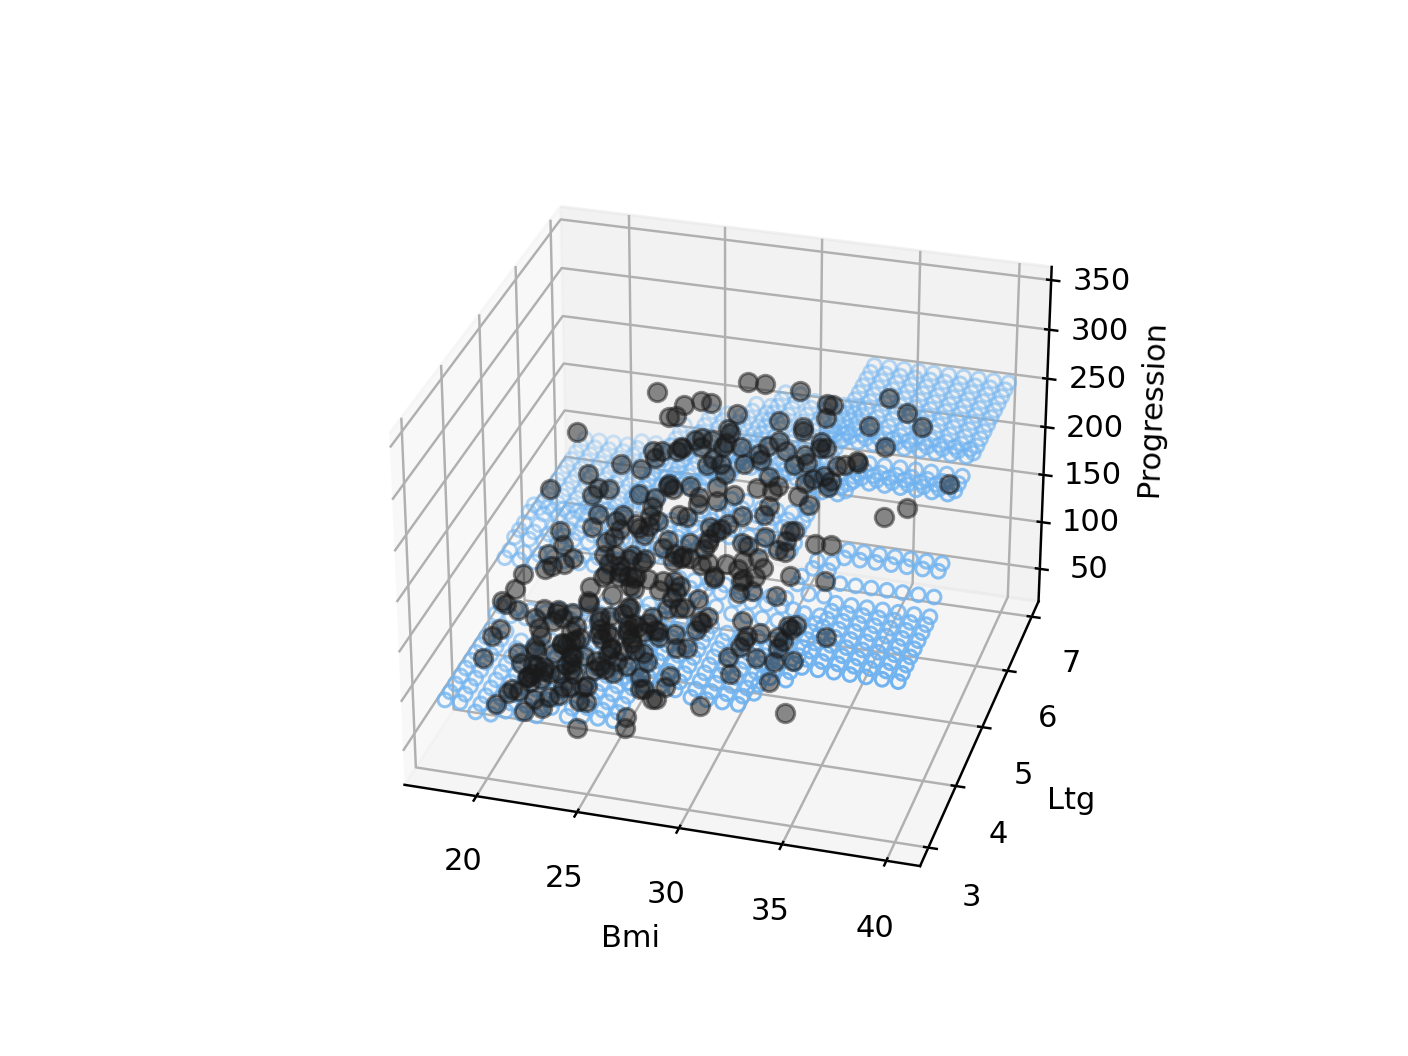

In [63]:
%matplotlib notebook

col_1 = 'Bmi'
col_2 = 'Ltg'

X = X_train[[col_1, col_2]].values.reshape(-1,2)
Y = y_train

x = X[:, 0]
y = X[:, 1]
z = Y

min1= round(X_train[col_1].min())
max1= round(X_train[col_1].max())+1

min2= round(X_train[col_2].min())
max2= round(X_train[col_2].max())+1


x_pred = np.linspace(min1, max1, 30)
y_pred = np.linspace(min2, max2, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = XGBRegressor(n_estimators=10, max_depth=2)
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

plt.style.use('default')

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax.set_xlabel('Bmi', fontsize=10)
ax.set_ylabel('Ltg', fontsize=10)
ax.set_zlabel('Progression', fontsize=10)

# Rotate the axes and update
for angle in range(0, 360*4 + 1):
    # Normalize the angle to the range [-180, 180] for display
    angle_norm = (angle + 180) % 360 - 180

    # Cycle through a full rotation of elevation, then azimuth, roll, and all
    elev = azim = roll = 0
    if angle <= 360:
        elev = angle_norm
    elif angle <= 360*2:
        azim = angle_norm
    elif angle <= 360*3:
        roll = angle_norm
    else:
        elev = azim = roll = angle_norm

    # Update the axis view and title
    ax.view_init(elev, azim, roll)

    plt.draw()
    plt.pause(.001)

#### Obervation:

XG Boost is a not a linear model, so we can't expect a straight plane on a 3d graph. From the above graph, we can notice that we got a somehow linear plane but curved one.

## Training XGBoost Model with all the parameters

In [77]:
full_model = XGBRegressor(n_estimators=100, max_depth=1)

In [78]:
full_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [79]:
# training MSE
mean_squared_error(y_true=y_train, y_pred=full_model.predict(X_train))

2070.371253562805

In [80]:
# Validation MSE
mean_squared_error(y_true=y_test, y_pred=full_model.predict(X_test))

2931.824599243766

Observation:
The training mean squared error (MSE) was 2070.3713 and validation MSE was 2931.8246. This indicates that the model is likely overfitting the training data, as the training MSE is much lower than the validation MSE.

In [87]:
trainsize_accuracies = []
train_sizes = [20, 50, 100, 200]

for trainSize in train_sizes:
    
    X_train, X_test, y_train, y_test = train_test_split(transformed_df.drop("Progression", axis=1), 
                                                        transformed_df['Progression'], 
                                                        train_size=trainSize,
                                                        random_state=45)
    
    xgb_model = XGBRegressor(n_estimators=100, max_depth=2)
    xgb_model.fit(X=X_train, y=y_train)
    
    train_accuracy = mean_squared_error(y_true=y_train, y_pred=xgb_model.predict(X_train))
    test_accuracy = mean_squared_error(y_true=y_test, y_pred=xgb_model.predict(X_test))
    trainsize_accuracies += [{'Train_Size':trainSize, "Training MSE":train_accuracy, "Validation MSE":test_accuracy}]
    
    del xgb_model
    
trainsize_accuracies_df = pd.DataFrame(trainsize_accuracies)

In [88]:
trainsize_accuracies_df

,Train_Size,Training MSE,Validation MSE
0,20,0.000878,4548.068636
1,50,3.628968,4945.065497
2,100,62.874555,4309.451497
3,200,443.201093,3672.698238


As the training set size increases, the training MSE and validation MSE decrease, indicating that the model is learning from more data and performing better. However, as the training set size increases, the improvement in validation MSE becomes smaller, suggesting that the model may be starting to overfit the training data. Overall, the results suggest that increasing the training set size can improve the performance of the model, but care should be taken to avoid overfitting.

### Conclusion:

From observing results from both the models, 
- 'BMI' is the most important feature, contributing more to the Diabetes Progression.
- 'BMI' and 'Ltg' can perform well when trained the model with these 2 features.
- Both 'Linear' and 'XGBoost' models tend to overfit a lot with low training data. 
- XGBoost is overfitting more even with max-depth of 2.
- Overall, Linear Regression model is performing well compared to the XGBoost, as the data seems to be linear, Decision tree regresion models are not a great option.
